In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

Mantendo apenas as colunas que mostram alguma métrica, para diminuir a quantidade de informação desnecessária.

In [2]:
classDF = pd.read_csv('class.csv')
classDF = classDF.iloc[:, 1:16]
classDF = classDF.drop(columns='lcom*')
classDF.info()
classDF['lcom']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            126 non-null    object 
 1   type             126 non-null    object 
 2   cbo              126 non-null    int64  
 3   cboModified      126 non-null    int64  
 4   fanin            126 non-null    int64  
 5   fanout           126 non-null    int64  
 6   wmc              126 non-null    int64  
 7   dit              126 non-null    int64  
 8   noc              126 non-null    int64  
 9   rfc              126 non-null    int64  
 10  lcom             126 non-null    int64  
 11  tcc              106 non-null    float64
 12  lcc              106 non-null    float64
 13  totalMethodsQty  126 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 13.9+ KB


0       6
1       0
2       1
3       8
4       1
       ..
121     3
122     1
123     0
124     1
125    10
Name: lcom, Length: 126, dtype: int64

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
lcomArray = np.array(classDF['lcom']).reshape(-1, 1)
lcomArray = scaler.fit_transform(lcomArray)

classDF['lcom'] = lcomArray



In [4]:
classDF['lcom']

0      0.109091
1      0.000000
2      0.018182
3      0.145455
4      0.018182
         ...   
121    0.054545
122    0.018182
123    0.000000
124    0.018182
125    0.181818
Name: lcom, Length: 126, dtype: float64

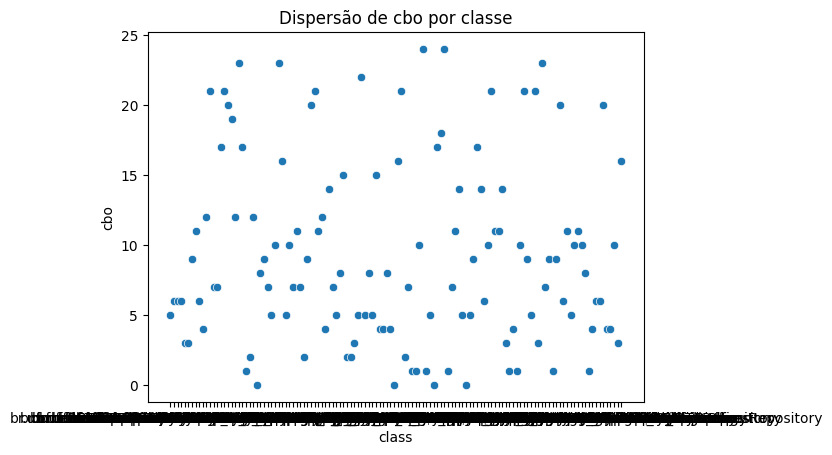

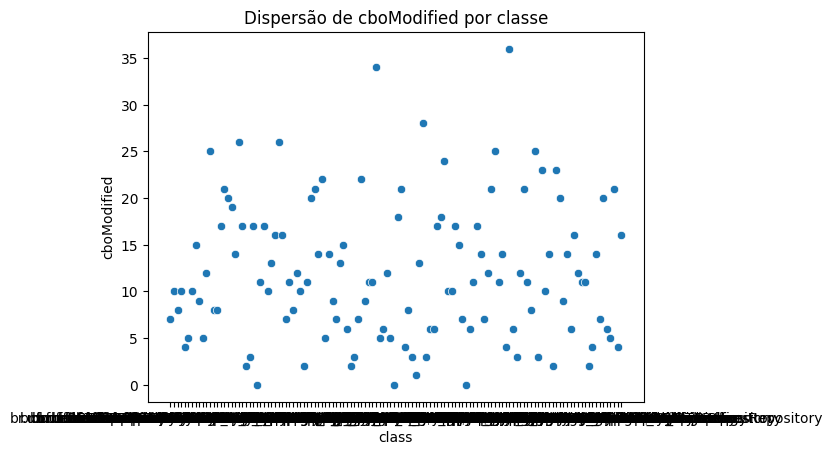

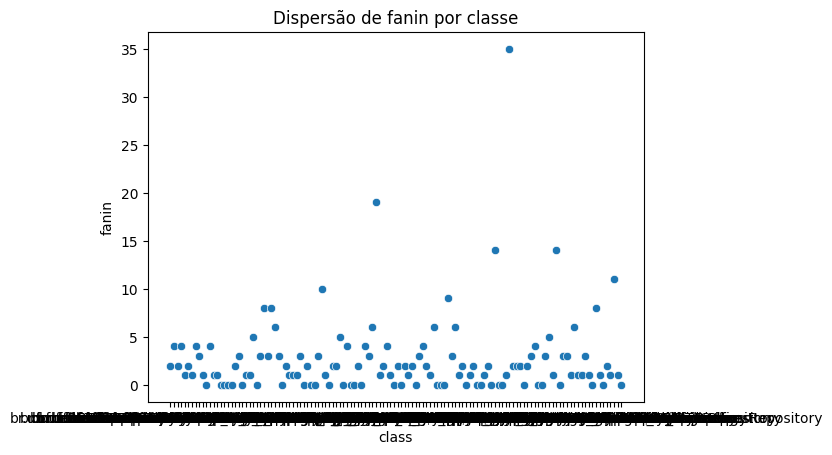

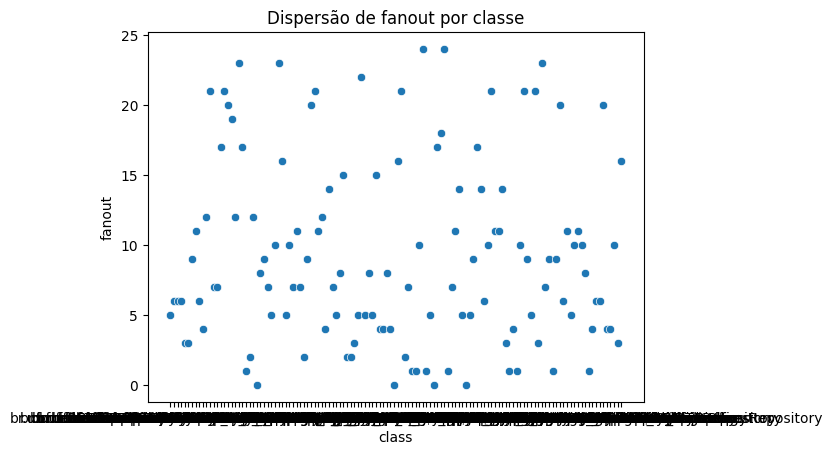

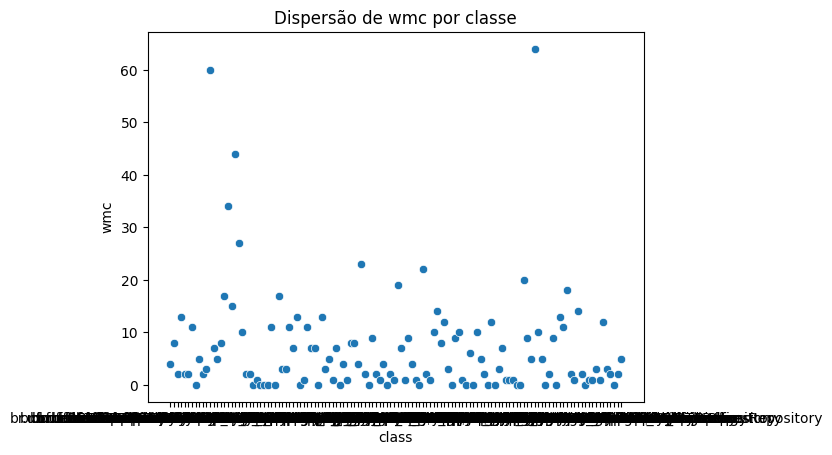

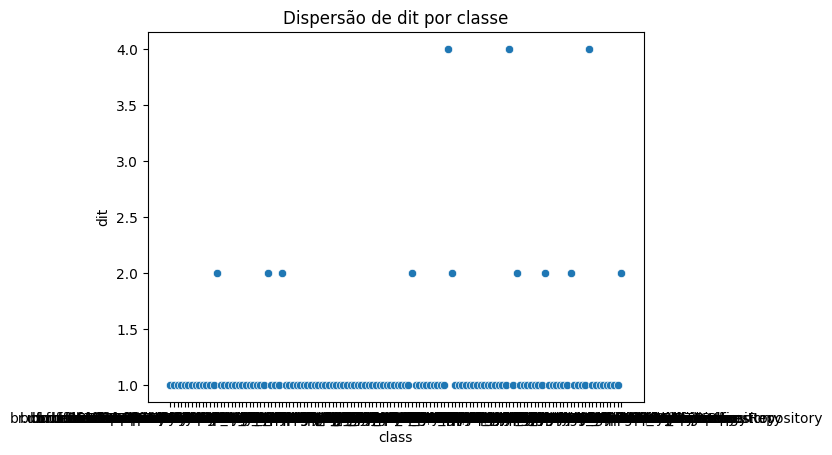

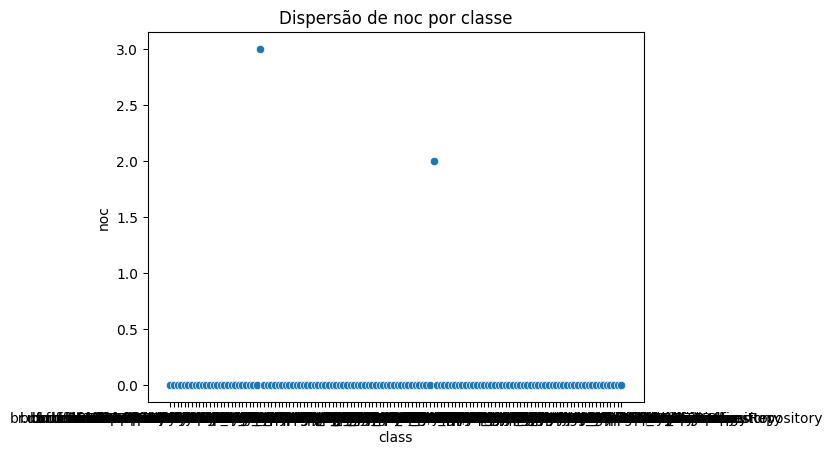

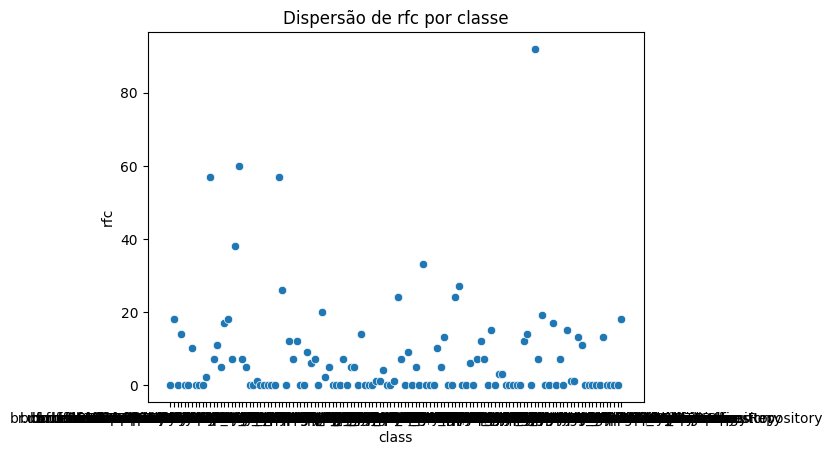

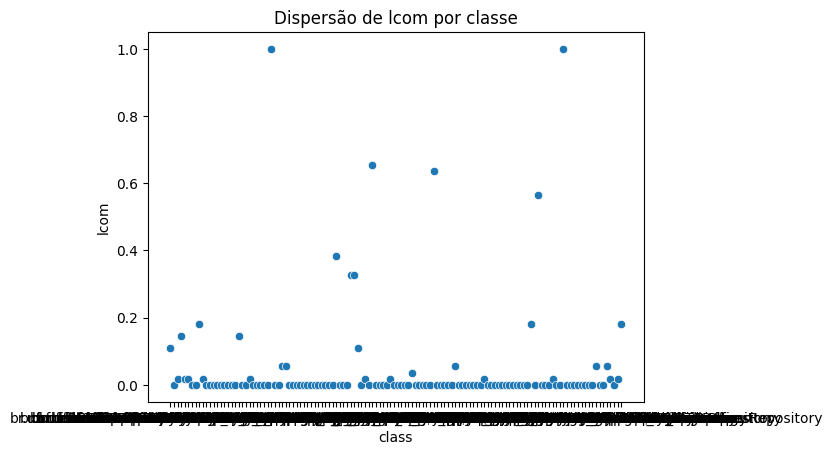

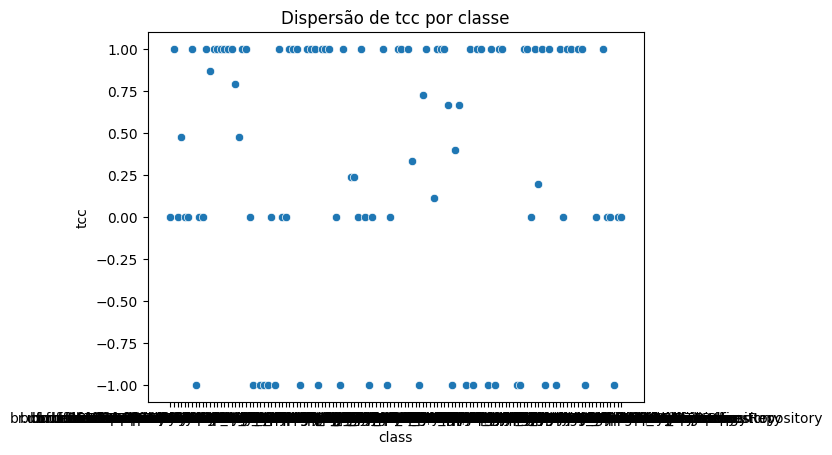

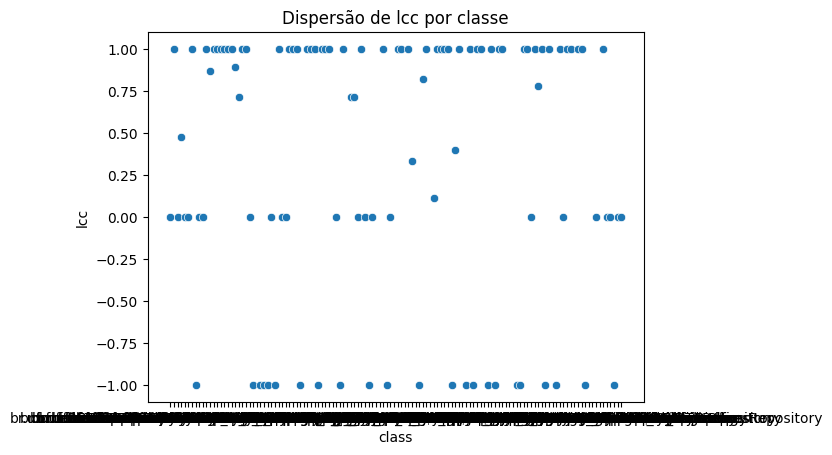

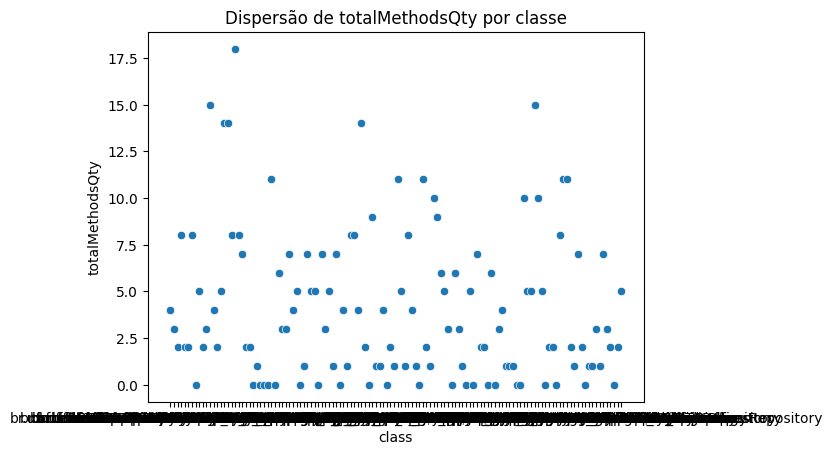

In [5]:
for column in classDF.columns[2:]:
    sns.scatterplot(data=classDF, x='class', y=column)
    plt.title(f'Dispersão de {column} por classe')
    plt.show()

Após análise de como são calculadas as métricas lcom, tcc e lcc, decidi substituir os NaN por 0

In [6]:
classDF = classDF.fillna(0)
classDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            126 non-null    object 
 1   type             126 non-null    object 
 2   cbo              126 non-null    int64  
 3   cboModified      126 non-null    int64  
 4   fanin            126 non-null    int64  
 5   fanout           126 non-null    int64  
 6   wmc              126 non-null    int64  
 7   dit              126 non-null    int64  
 8   noc              126 non-null    int64  
 9   rfc              126 non-null    int64  
 10  lcom             126 non-null    float64
 11  tcc              126 non-null    float64
 12  lcc              126 non-null    float64
 13  totalMethodsQty  126 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 13.9+ KB


In [10]:
for column in classDF.columns[2:]:
    print(str(column) + ": " + str(classDF[column].max()))

cbo: 24
cboModified: 36
fanin: 35
fanout: 24
wmc: 64
dit: 4
noc: 3
rfc: 92
lcom: 1.0
tcc: 1.0
lcc: 1.0
totalMethodsQty: 18
